<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/91_DOE_2_a_6_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Diseño con seis factores $2^6$**
### **Problema de aplicación**: *Se desea estudiar las posibles causas que afectan el rendimiento escolar de un centro educativo en una localidad urbana. De acuerdo con la experiencia del grupo de investigación, los factores que podían tener mayor influencia sobre la variable de respuesta (rendimiento académico), así como los niveles de prueba utilizados, son los siguientes:*
- A = Personalidad (Introvertido, extrovertido)
- B = Ansiedad (Baja Ansiedad, Alta ansiedad)
- C = Recursos (Bajo recursos, Altos recursos)
- D = Mentalidad (Mentalidad fija, Mentalidad progresiva)
- E= Autoestima (Baja autoestima, Alta autoestima)
- F= Horas Estudio independiente (Bajo, Alto)

### Se corre un experimento 26 con una sola réplica para estudiar sus seis factores. Se hacen las 64 corridas y los resultados escritos en el orden estándar se muestran en la tabla siguiente:*

#### **Tabla Diseño Factorial $2^6$**

|(1)	= 50|	e =	55|	f =	60|	ef=	65|
|:--:|:--:|:--:|:--:|
|a	= 70|	ae =	65|	af	= 70|	aef =	65|
|b =	50|	be =	70|	bf =	70|	bef =	60|
|ab =	70 |	abe =	60|	abf =	60|	abef =	70|
|c	= 70|	ce =	65|	cf =	80|	cef =	80|
|ac	= 60|	ace =	70|	acf =	80|	acef	= 80|
|bc =	70|	bce =	60|	bcf =	70|	bcef =	70|
|abc =	60|	abce =	70|	abcf =	80|	abcef =	80|
|d =	55|	de =	70|	df =	70|	def =	80|
|ad =	65|	ade =	80|	adf	 = 80|	adef =	70|
|bd =	70|	bde =	70	|bdf =	60	|bdef =	70|
|abd =	60|	abde =	70|	abdf =	70|	abdef =	80|
|cd	= 70	|cde	= 80	|cdf =	70	|cdef	= 80|
|acd =	70|	acde =	80|	acdf =	70|	acdef	=80|
|bcd	= 60|	bcde	= 70|	bcdf =	70|	bcdef	=80|
|abcd	= 70|	abcde	= 80|	abcdf	= 80|	abcdef =	100|



# **Librerias a usar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Ingresando los datos del problema a Python**

In [ ]:
Personalidad  =  [ "A1" ,  "A2" ]
Ansiedad   =  [ "B1" ,  "B2" ]
Recursos  =  [ "C1" ,  "C2" ]
Mentalidad =  [ "D1" ,  "D2" ]
Autoestima =  [ "E1" ,  "E2" ]
Horas_Estudio =  [ "F1" ,  "F2" ]


Rendimiento = [50, 70, 50, 70, 70, 60, 70, 60, 55, 65, 70, 60, 70, 70, 60, 70,
55, 65, 70, 60, 65, 70, 60, 70, 70, 80, 70, 70, 80, 80, 70, 80,
60, 70, 70, 60, 80, 80, 70, 80, 70, 80, 60, 70, 70, 70, 70, 80,
65, 65, 60, 70, 80, 80, 70, 80, 80, 70, 70, 80, 80, 80, 80, 100]


In [ ]:
Personalidad  =  (["A1"]*1 + ["A2" ]*1)*32
Ansiedad   =  (["B1"]*2 + ["B2" ]*2)*16
Recursos  =  (["C1"]*4 + ["C2" ]*4)*8
Mentalidad =  (["D1"]*8 + ["D2" ]*8)*4
Autoestima =  (["E1"]*16 + ["E2" ]*16)*2
Horas_Estudio = (["F1"]*32 + ["F2" ]*32)*1

In [ ]:
datos  = pd.DataFrame({    'Personalidad': Personalidad,    'Ansiedad': Ansiedad,    'Recursos': Recursos,
                       'Mentalidad': Mentalidad,    'Autoestima': Autoestima,    'Horas_Estudio': Horas_Estudio,
                       'Rendimiento': Rendimiento})

In [ ]:
datos

,Personalidad,Ansiedad,Recursos,Mentalidad,Autoestima,Horas_Estudio,Rendimiento
0,A1,B1,C1,D1,E1,F1,50
1,A2,B1,C1,D1,E1,F1,70
2,A1,B2,C1,D1,E1,F1,50
3,A2,B2,C1,D1,E1,F1,70
4,A1,B1,C2,D1,E1,F1,70
...,...,...,...,...,...,...,...
59,A2,B2,C1,D2,E2,F2,80
60,A1,B1,C2,D2,E2,F2,80
61,A2,B1,C2,D2,E2,F2,80
62,A1,B2,C2,D2,E2,F2,80


# mas librerías importantes

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **Anova**

In [ ]:
model6f = ols('Rendimiento ~ Personalidad*Ansiedad+Personalidad*Recursos+Personalidad*Mentalidad+Personalidad*Autoestima+Personalidad*Horas_Estudio+Ansiedad*Recursos+Ansiedad*Mentalidad+ Ansiedad*Autoestima+Ansiedad*Horas_Estudio+Recursos*Mentalidad+ Recursos*Autoestima+Recursos*Horas_Estudio +Mentalidad*Autoestima+Mentalidad*Horas_Estudio+ Autoestima*Horas_Estudio',                 # Model formula
            data = datos).fit()

anova_result = sm.stats.anova_lm(model6f, typ=2)
print (anova_result)

# **Diagramas de caja Bivariados**

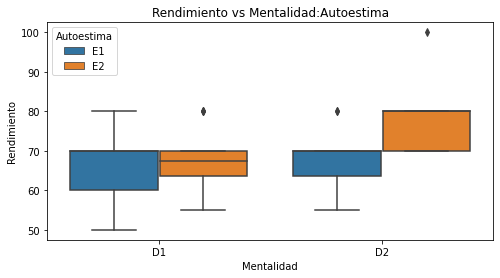

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Mentalidad:Autoestima')
sns.boxplot(x="Mentalidad", y="Rendimiento", hue='Autoestima', data=datos, ax=ax);

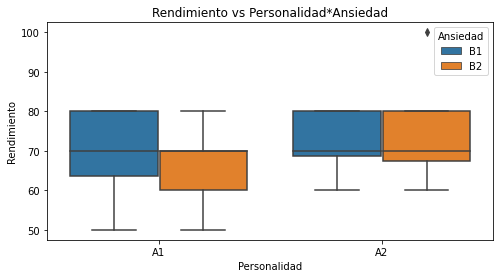

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Personalidad*Ansiedad')
sns.boxplot(x="Personalidad", y="Rendimiento", hue='Ansiedad', data=datos, ax=ax);

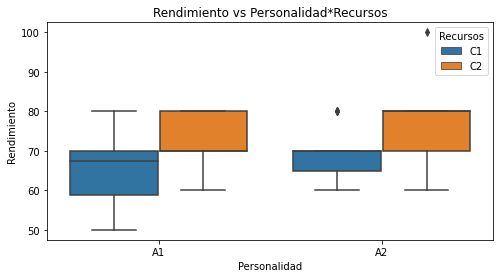

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Personalidad*Recursos')
sns.boxplot(x="Personalidad", y="Rendimiento", hue='Recursos', data=datos, ax=ax);

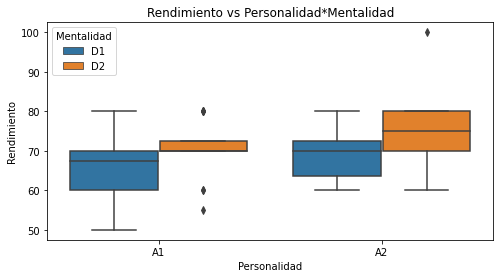

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Personalidad*Mentalidad')
sns.boxplot(x="Personalidad", y="Rendimiento", hue='Mentalidad', data=datos, ax=ax);

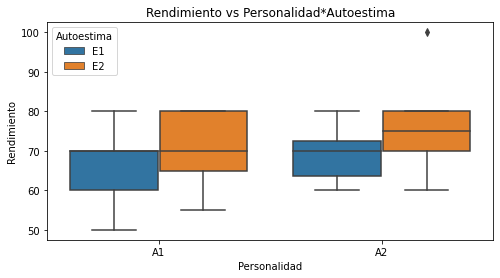

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Personalidad*Autoestima')
sns.boxplot(x="Personalidad", y="Rendimiento", hue='Autoestima', data=datos, ax=ax);

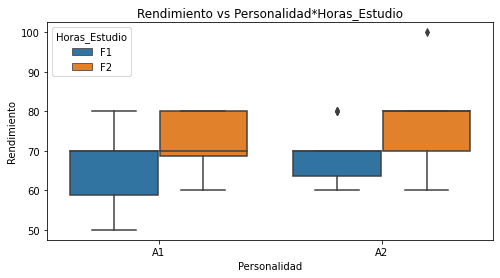

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Personalidad*Horas_Estudio')
sns.boxplot(x="Personalidad", y="Rendimiento", hue='Horas_Estudio', data=datos, ax=ax);

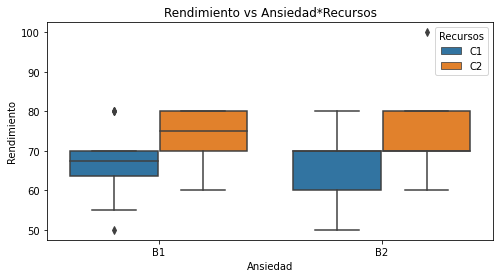

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Ansiedad*Recursos')
sns.boxplot(x="Ansiedad", y="Rendimiento", hue='Recursos', data=datos, ax=ax);

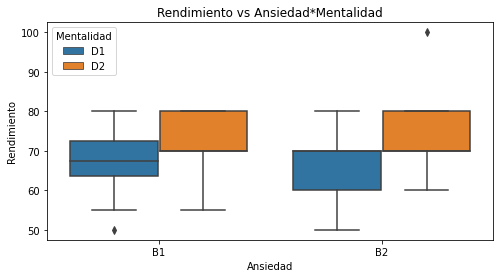

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Ansiedad*Mentalidad')
sns.boxplot(x="Ansiedad", y="Rendimiento", hue='Mentalidad', data=datos, ax=ax);

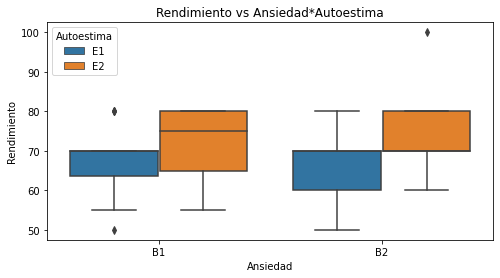

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Ansiedad*Autoestima')
sns.boxplot(x="Ansiedad", y="Rendimiento", hue='Autoestima', data=datos, ax=ax);

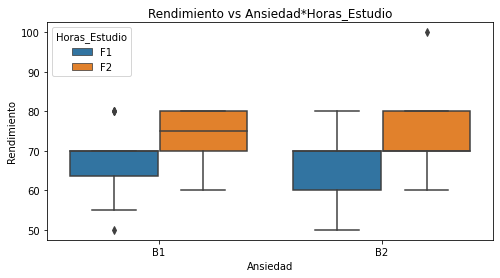

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Ansiedad*Horas_Estudio')
sns.boxplot(x="Ansiedad", y="Rendimiento", hue='Horas_Estudio', data=datos, ax=ax);

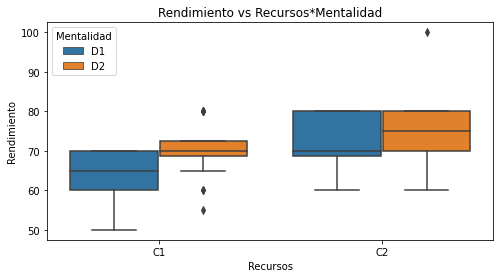

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Recursos*Mentalidad')
sns.boxplot(x="Recursos", y="Rendimiento", hue='Mentalidad', data=datos, ax=ax);

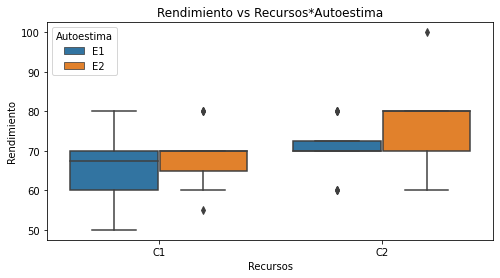

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Recursos*Autoestima')
sns.boxplot(x="Recursos", y="Rendimiento", hue='Autoestima', data=datos, ax=ax);

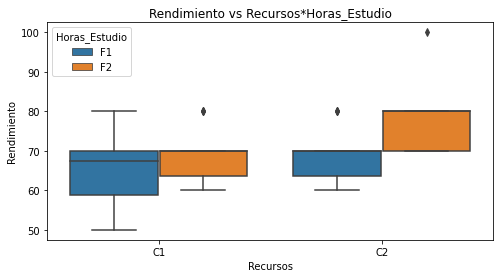

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Recursos*Horas_Estudio')
sns.boxplot(x="Recursos", y="Rendimiento", hue='Horas_Estudio', data=datos, ax=ax);

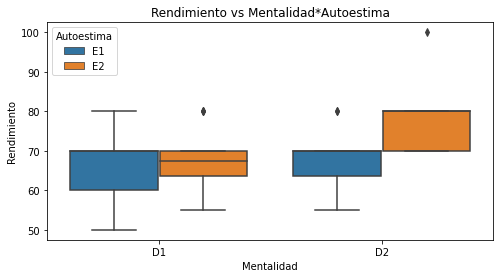

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Mentalidad*Autoestima')
sns.boxplot(x="Mentalidad", y="Rendimiento", hue='Autoestima', data=datos, ax=ax);

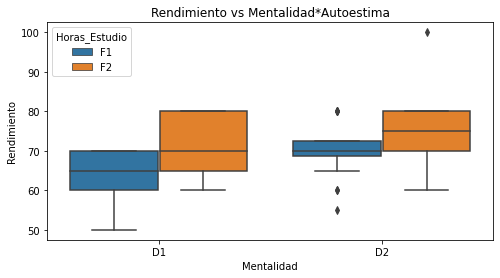

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Mentalidad*Autoestima')
sns.boxplot(x="Mentalidad", y="Rendimiento", hue='Horas_Estudio', data=datos, ax=ax);

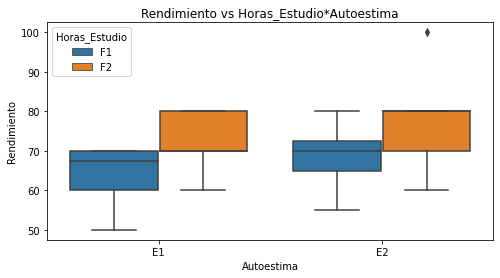

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Horas_Estudio*Autoestima')
sns.boxplot(x="Autoestima", y="Rendimiento", hue='Horas_Estudio', data=datos, ax=ax);